# 기업 부도 예측 모델 - Feature Engineering (특징 공학)

## 목표
- 경제학적 가설 기반 파생 변수 생성
- 유동성, 지급불능, 수익성, 활동성 지표 생성
- Altman Z-Score 변형 모델 적용
- 성장성 및 행동 데이터 파생 변수
- 변수 간 상호작용 및 결측치 정보 활용

## Parameters (Papermill)

In [1]:
# Papermill parameters
data_path = '../data/기업신용평가정보_210801.csv'
output_path = '../data/processed/features_generated.csv'
random_state = 42

In [2]:
# Parameters
data_path = "data/\uae30\uc5c5\uc2e0\uc6a9\ud3c9\uac00\uc815\ubcf4_210801.csv"


## 1. 환경 설정

In [3]:
# 기본 라이브러리
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os
warnings.filterwarnings('ignore')

# 프로젝트 모듈
from src.utils import (
    load_config,
    setup_plotting_style,
    load_data,
    print_data_info
)
from src.features import FeatureGenerator
from src.constants import TARGET_COLUMN

# 한글 폰트 및 플롯 스타일 설정
setup_plotting_style()

# 설정 로드
config = load_config()

print(f"✅ 모듈 로드 완료 - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ Korean font set: NanumGothic (Custom: /home/user/jjjj/assets/fonts/NanumGothic.ttf)
✅ 모듈 로드 완료 - 2025-11-20 02:57:40


## 2. 데이터 로드

In [4]:
# 데이터 로드
df = load_data(data_path)

print(f"\n데이터 shape: {df.shape}")
print(f"타겟 변수 분포:")
print(df[TARGET_COLUMN].value_counts())
print(f"\n부도율: {df[TARGET_COLUMN].mean()*100:.2f}%")

✓ Data loaded with encoding: utf-8
  Shape: (50105, 159)

데이터 shape: (50105, 159)
타겟 변수 분포:
모형개발용Performance(향후1년내부도여부)
0    49346
1      759
Name: count, dtype: int64

부도율: 1.51%


## 3. Feature Generation (특징 공학)

In [5]:
# FeatureGenerator 초기화
feature_gen = FeatureGenerator(config=config)

# 변수 생성 전 컬럼 수
cols_before = len(df.columns)
print(f"\n변수 생성 전 컬럼 수: {cols_before}\n")

# 모든 파생 변수 생성
df_features = feature_gen.fit_transform(df)

# 새로 생성된 변수들
new_features = [col for col in df_features.columns if col not in df.columns]
print(f"\n\n📊 생성된 파생 변수 ({len(new_features)}개):")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")


변수 생성 전 컬럼 수: 159

🔧 Generating features...
  ✓ Liquidity features
  ✓ Solvency features


  ✓ Profitability features
  ✓ Activity features


  ✓ Altman Z-Score
  ✓ Growth features


  ✓ Behavioral features
  ✓ Missing indicators


  ✓ Interaction features
✅ Feature generation complete.
   - Initial columns: 159
   - New features: 51
   - Total columns: 210


📊 생성된 파생 변수 (51개):
   1. 순운전자본비율
   2. 유동비율
   3. 현금흐름부채커버리지
   4. 현금흐름이자보상배율
   5. 부채비율_FE
   6. 자기자본비율_FE
   7. 이자보상배율_FE
   8. EBITDA이자보상배율
   9. 자본잠식여부
  10. 차입금의존도_FE
  11. 순차입금비율_FE
  12. 매출총이익률
  13. 영업이익률
  14. 순이익률
  15. ROA
  16. ROE
  17. 이익의질_Accruals
  18. 총자산회전율
  19. 재고자산회전율
  20. 매출채권회전율
  21. 유동성_효율성_교차
  22. Altman_Z_Score
  23. Z_X1_WorkingCapital
  24. Z_X2_RetainedEarnings
  25. Z_X3_EBIT
  26. Z_X4_Equity
  27. Z_X5_Sales
  28. 매출액증가율_YoY
  29. 영업이익증가율_YoY
  30. 당기순이익증가율_YoY
  31. 자산증가율_YoY
  32. 자본증가율_YoY
  33. 연체강도지수
  34. 연체여부_미해제
  35. 연체여부_3개월
  36. 장기연체여부_30일
  37. 세금체납여부
  38. 연체기관수_로그
  39. 최장연체일수_5년_로그
  40. 최근공공정보경과일_역수
  41. Is_Missing_이자비용
  42. Is_Missing_이자보상배율
  43. Is_Missing_영업활동현금흐름
  44. Is_Missing_차입금
  45. Is_Missing_단기차입금
  46. Is_Missing_EBITDA
  47. Is_Missing_재무비율_총자산순이익률
  48. Is_Missing_재무비율_당기순이익율
  49. 부채이자교

## 4. 생성된 변수 기본 통계

In [6]:
# 생성된 변수들의 기본 통계
if len(new_features) > 0:
    print("="*80)
    print("생성된 파생 변수 기본 통계")
    print("="*80)
    
    stats_df = df_features[new_features].describe().T
    stats_df['missing'] = df_features[new_features].isnull().sum()
    stats_df['missing_pct'] = (stats_df['missing'] / len(df_features)) * 100
    
    print(stats_df[['mean', 'std', 'min', '50%', 'max', 'missing', 'missing_pct']])

생성된 파생 변수 기본 통계
                                 mean           std           min  \
순운전자본비율                  1.260137e-01  2.514104e+00 -3.801579e+02   
유동비율                     2.681589e+11  2.492951e+13 -3.311790e+05   
현금흐름부채커버리지               7.790710e-02  1.282325e+00 -7.120682e+01   
현금흐름이자보상배율               1.047438e+14  2.539520e+15 -6.985484e+16   
부채비율_FE                  7.887195e-01  6.913437e+02 -1.044365e+05   
자기자본비율_FE                3.768458e-01  2.178485e+00 -3.396632e+02   
이자보상배율_FE               -3.565601e+13  2.627075e+16 -5.863435e+18   
EBITDA이자보상배율            -7.030323e+12  2.617465e+16 -5.836984e+18   
자본잠식여부                   1.278715e-01  3.339500e-01  0.000000e+00   
차입금의존도_FE                4.616094e-01  3.709099e+00 -8.251339e+00   
순차입금비율_FE                2.897444e-01  3.860224e+00 -8.092793e+00   
매출총이익률                  -1.616702e+12  3.000078e+14 -6.678725e+16   
영업이익률                   -1.198321e+13  4.859564e+14 -6.947133e+16   
순이익률              

## 5. 타겟 변수와의 상관관계 분석

In [7]:
# 타겟 변수와의 상관관계 (숫자형 변수만)
numeric_features = df_features[new_features].select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_features) > 0 and TARGET_COLUMN in df_features.columns:
    correlations = df_features[numeric_features + [TARGET_COLUMN]].corr()[TARGET_COLUMN].drop(TARGET_COLUMN)
    correlations = correlations.sort_values(ascending=False)
    
    print("\n" + "="*80)
    print("타겟 변수와의 상관관계 (상위 20개)")
    print("="*80)
    print(correlations.head(20))
    
    print("\n" + "="*80)
    print("타겟 변수와의 상관관계 (하위 20개)")
    print("="*80)
    print(correlations.tail(20))


타겟 변수와의 상관관계 (상위 20개)
연체기관수_로그                   0.323477
연체여부_미해제                   0.305477
연체강도지수                     0.248927
장기연체여부_30일                 0.232446
연체여부_3개월                   0.223045
최장연체일수_5년_로그               0.180217
최근공공정보경과일_역수               0.163858
세금체납여부                     0.163066
자본잠식여부                     0.051350
순차입금비율_FE                  0.037048
차입금의존도_FE                  0.035473
총자산회전율                     0.024570
Z_X5_Sales                 0.024570
연체부채교차                     0.018774
부채이자교차                     0.017831
부채비율_FE                    0.014448
Is_Missing_재무비율_총자산순이익률    0.009370
Is_Missing_재무비율_당기순이익율     0.007884
자산증가율_YoY                  0.007733
Is_Missing_이자보상배율          0.004753
Name: 모형개발용Performance(향후1년내부도여부), dtype: float64

타겟 변수와의 상관관계 (하위 20개)
매출액증가율_YoY              -0.001456
당기순이익증가율_YoY            -0.002633
현금흐름이자보상배율              -0.005162
재고자산회전율                 -0.005367
현금흐름부채커버리지              -0.007214
순이익률          

## 6. 주요 파생 변수 시각화

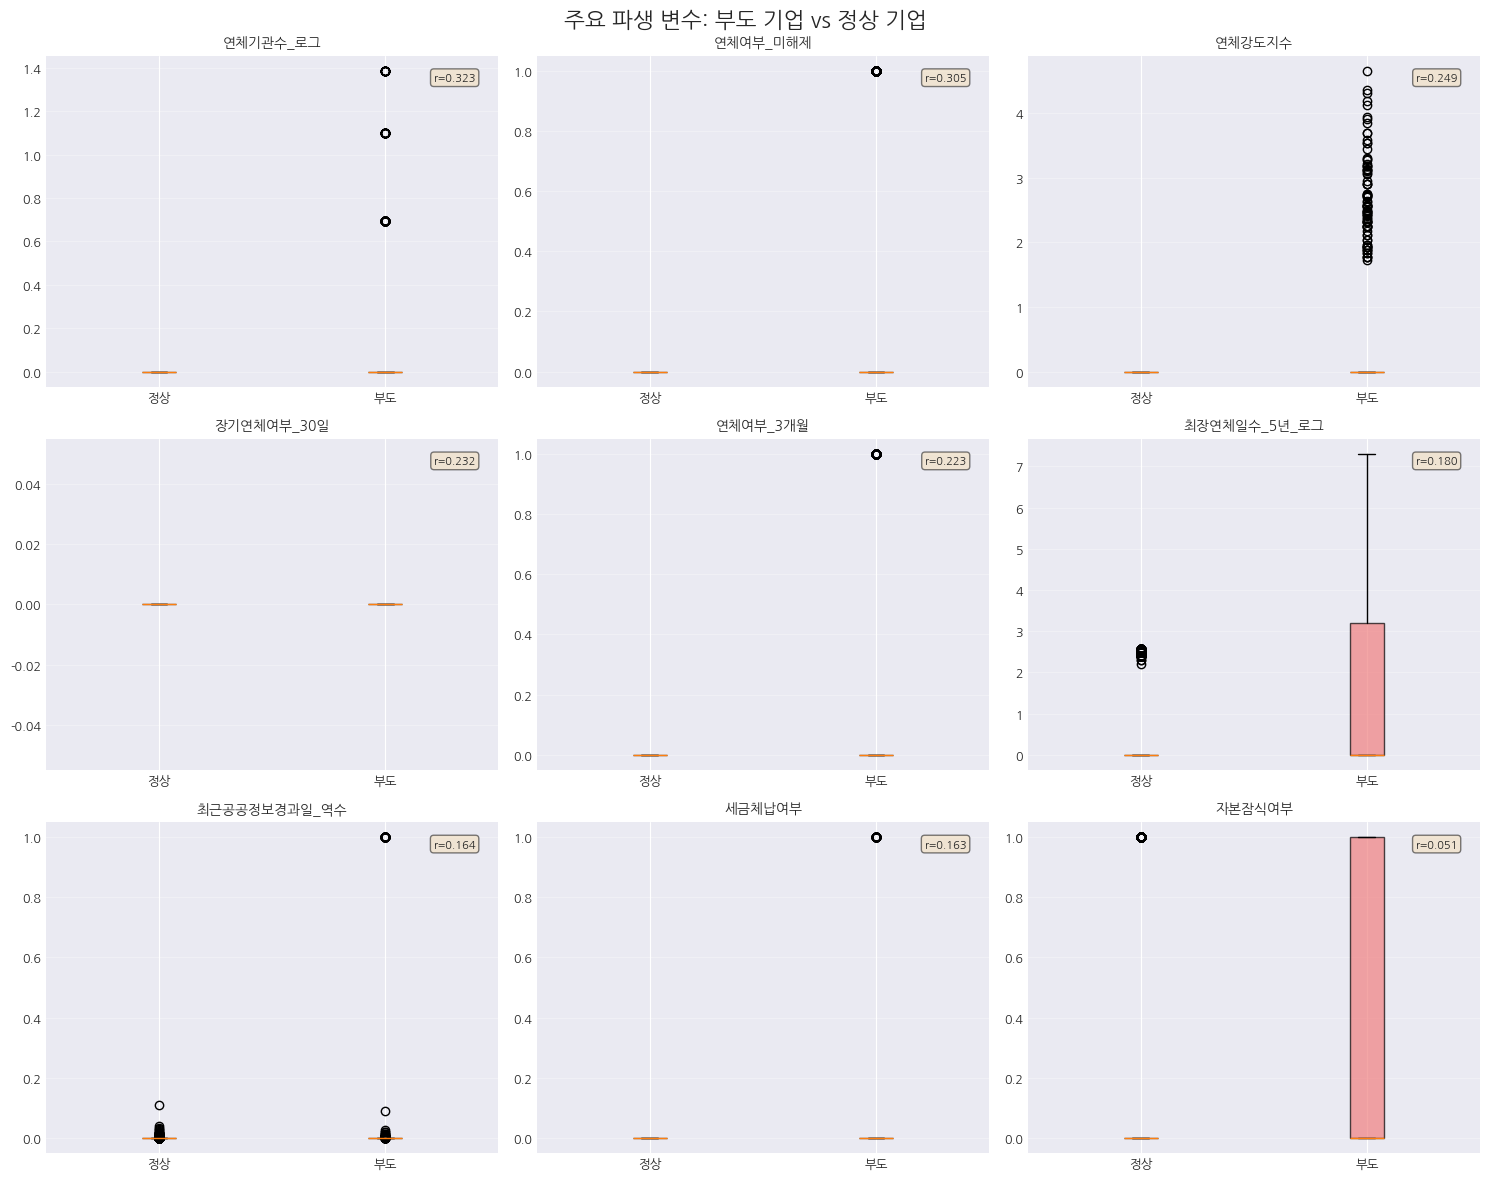

In [8]:
# 타겟과 상관관계가 높은 상위 변수 시각화
if len(numeric_features) > 0 and TARGET_COLUMN in df_features.columns:
    top_features = correlations.abs().sort_values(ascending=False).head(9).index.tolist()
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, feat in enumerate(top_features):
        if feat in df_features.columns:
            # 부도/정상 기업별 박스플롯
            data_to_plot = []
            labels = []
            
            for target_val in [0, 1]:
                subset = df_features[df_features[TARGET_COLUMN] == target_val][feat].dropna()
                if len(subset) > 0:
                    # 이상치 제거 (±3 std)
                    mean_val = subset.mean()
                    std_val = subset.std()
                    subset_clean = subset[(subset >= mean_val - 3*std_val) & (subset <= mean_val + 3*std_val)]
                    data_to_plot.append(subset_clean)
                    labels.append('정상' if target_val == 0 else '부도')
            
            if len(data_to_plot) > 0:
                bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
                colors = ['lightgreen', 'lightcoral']
                for patch, color in zip(bp['boxes'], colors):
                    patch.set_facecolor(color)
                    patch.set_alpha(0.7)
                
                axes[i].set_title(feat, fontsize=10, fontweight='bold')
                axes[i].grid(alpha=0.3, axis='y')
                
                # 상관계수 표시
                corr_val = correlations[feat]
                axes[i].text(0.95, 0.95, f'r={corr_val:.3f}',
                           transform=axes[i].transAxes,
                           ha='right', va='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                           fontsize=8)
    
    plt.suptitle('주요 파생 변수: 부도 기업 vs 정상 기업', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 7. Altman Z-Score 분석

Altman Z-Score 분석

                정상기업         부도기업
count  4.934600e+04   759.000000
mean   2.078868e+09    -1.171470
std    3.038047e+11    64.517808
min   -1.927800e+12 -1761.662309
25%    1.308486e+00     0.216930
50%    2.628753e+00     1.484030
75%    4.377189e+00     2.934958
max    6.006300e+13    35.709661

Z-Score 구간별 부도율 (Altman Zone 분석)

                     기업수  부도수       부도율
Z_Zone                                
Distress (<1.81)  17404  428  2.459205
Grey (1.81-2.99)  10887  147  1.350234
Safe (>=2.99)     21814  184  0.843495


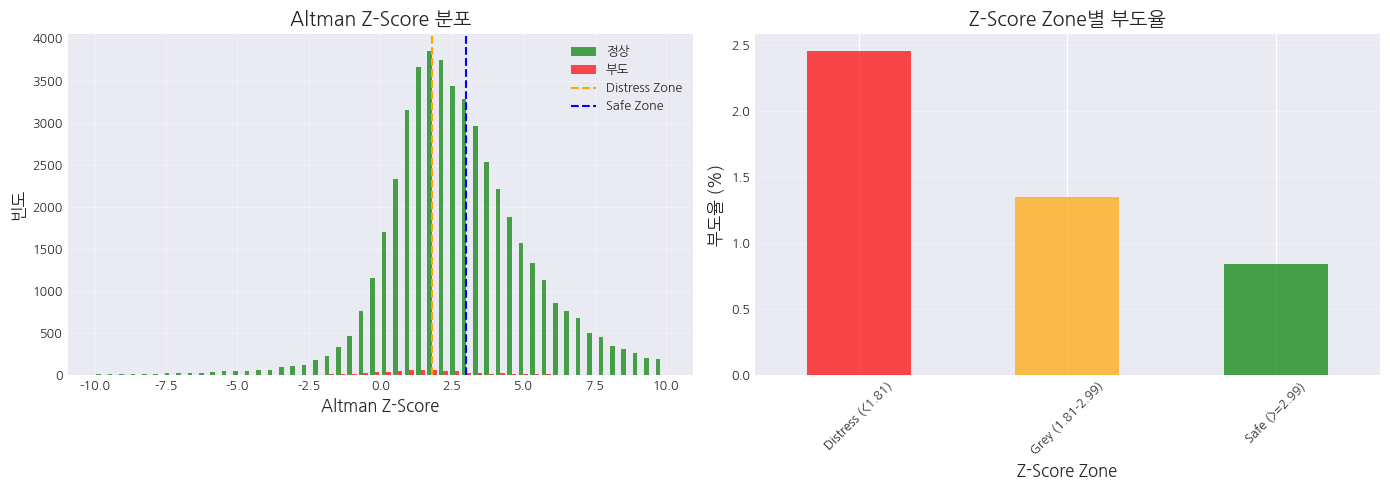

In [9]:
# Altman Z-Score 분석
if 'Altman_Z_Score' in df_features.columns and TARGET_COLUMN in df_features.columns:
    print("="*80)
    print("Altman Z-Score 분석")
    print("="*80)
    
    # 정상 vs 부도 기업의 Z-Score 비교
    z_score_normal = df_features[df_features[TARGET_COLUMN]==0]['Altman_Z_Score'].describe()
    z_score_bankrupt = df_features[df_features[TARGET_COLUMN]==1]['Altman_Z_Score'].describe()
    
    comparison = pd.DataFrame({
        '정상기업': z_score_normal,
        '부도기업': z_score_bankrupt
    })
    print("\n", comparison)
    
    # Z-Score 구간별 부도율
    print("\n" + "="*80)
    print("Z-Score 구간별 부도율 (Altman Zone 분석)")
    print("="*80)
    
    # Altman Z-Score 기준
    # Z < 1.81: Distress Zone (부도 가능성 높음)
    # 1.81 <= Z < 2.99: Grey Zone (불확실)
    # Z >= 2.99: Safe Zone (안전)
    
    df_features['Z_Zone'] = pd.cut(df_features['Altman_Z_Score'],
                                    bins=[-np.inf, 1.81, 2.99, np.inf],
                                    labels=['Distress (<1.81)', 'Grey (1.81-2.99)', 'Safe (>=2.99)'])
    
    zone_analysis = df_features.groupby('Z_Zone')[TARGET_COLUMN].agg(['count', 'sum', 'mean'])
    zone_analysis.columns = ['기업수', '부도수', '부도율']
    zone_analysis['부도율'] = zone_analysis['부도율'] * 100
    print("\n", zone_analysis)
    
    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Z-Score 분포
    z_clean = df_features['Altman_Z_Score'].dropna()
    z_clean = z_clean[(z_clean >= -10) & (z_clean <= 10)]  # 극단값 제거
    
    axes[0].hist([z_clean[df_features.loc[z_clean.index, TARGET_COLUMN]==0],
                  z_clean[df_features.loc[z_clean.index, TARGET_COLUMN]==1]],
                 bins=50, alpha=0.7, label=['정상', '부도'], color=['green', 'red'])
    axes[0].axvline(1.81, color='orange', linestyle='--', label='Distress Zone')
    axes[0].axvline(2.99, color='blue', linestyle='--', label='Safe Zone')
    axes[0].set_xlabel('Altman Z-Score', fontsize=12)
    axes[0].set_ylabel('빈도', fontsize=12)
    axes[0].set_title('Altman Z-Score 분포', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Zone별 부도율
    zone_analysis['부도율'].plot(kind='bar', ax=axes[1], color=['red', 'orange', 'green'], alpha=0.7)
    axes[1].set_xlabel('Z-Score Zone', fontsize=12)
    axes[1].set_ylabel('부도율 (%)', fontsize=12)
    axes[1].set_title('Z-Score Zone별 부도율', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='y')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

## 8. 행동 데이터 파생 변수 분석

In [10]:
# 연체 관련 파생 변수 분석
behavioral_features = ['연체강도지수', '연체여부_미해제', '연체여부_3개월', 
                       '장기연체여부_30일', '세금체납여부']

available_behavioral = [f for f in behavioral_features if f in df_features.columns]

if len(available_behavioral) > 0 and TARGET_COLUMN in df_features.columns:
    print("="*80)
    print("행동 데이터 파생 변수와 부도율")
    print("="*80)
    
    for feat in available_behavioral:
        if df_features[feat].dtype in ['int64', 'float64']:
            # 이진 변수인 경우
            if df_features[feat].nunique() <= 2:
                has_issue = df_features[feat].fillna(0) > 0
                
                if has_issue.sum() > 0:
                    bankruptcy_with = df_features[has_issue][TARGET_COLUMN].mean() * 100
                    bankruptcy_without = df_features[~has_issue][TARGET_COLUMN].mean() * 100
                    multiplier = bankruptcy_with / bankruptcy_without if bankruptcy_without > 0 else 0
                    
                    print(f"\n{feat}:")
                    print(f"  - 해당 있음: {has_issue.sum():,}개 ({has_issue.sum()/len(df_features)*100:.2f}%)")
                    print(f"  - 해당 있을 때 부도율: {bankruptcy_with:.2f}%")
                    print(f"  - 해당 없을 때 부도율: {bankruptcy_without:.2f}%")
                    print(f"  - 부도율 증가 배수: {multiplier:.1f}배")

행동 데이터 파생 변수와 부도율

연체여부_미해제:
  - 해당 있음: 325개 (0.65%)
  - 해당 있을 때 부도율: 47.69%
  - 해당 없을 때 부도율: 1.21%
  - 부도율 증가 배수: 39.3배

연체여부_3개월:
  - 해당 있음: 415개 (0.83%)
  - 해당 있을 때 부도율: 31.33%
  - 해당 없을 때 부도율: 1.27%
  - 부도율 증가 배수: 24.7배

장기연체여부_30일:
  - 해당 있음: 97개 (0.19%)
  - 해당 있을 때 부도율: 65.98%
  - 해당 없을 때 부도율: 1.39%
  - 부도율 증가 배수: 47.5배

세금체납여부:
  - 해당 있음: 269개 (0.54%)
  - 해당 있을 때 부도율: 28.62%
  - 해당 없을 때 부도율: 1.37%
  - 부도율 증가 배수: 20.9배


## 9. 데이터 저장

In [11]:
# 처리된 데이터 저장
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# CSV로 저장
df_features.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"\n✅ 데이터 저장 완료: {output_path}")
print(f"   - Shape: {df_features.shape}")
print(f"   - 파일 크기: {os.path.getsize(output_path) / 1024 / 1024:.2f} MB")


✅ 데이터 저장 완료: ../data/processed/features_generated.csv
   - Shape: (50105, 211)
   - 파일 크기: 80.19 MB


## 10. 요약

In [12]:
print("="*80)
print("Feature Engineering 요약")
print("="*80)
print(f"\n1. 데이터 정보")
print(f"   - 총 샘플 수: {len(df_features):,}개")
print(f"   - 원본 변수 수: {cols_before}개")
print(f"   - 생성된 변수 수: {len(new_features)}개")
print(f"   - 최종 변수 수: {len(df_features.columns)}개")

print(f"\n2. 타겟 변수")
print(f"   - 정상 기업: {(df_features[TARGET_COLUMN]==0).sum():,}개 ({(df_features[TARGET_COLUMN]==0).mean()*100:.2f}%)")
print(f"   - 부도 기업: {(df_features[TARGET_COLUMN]==1).sum():,}개 ({(df_features[TARGET_COLUMN]==1).mean()*100:.2f}%)")

if len(numeric_features) > 0:
    print(f"\n3. 상관관계 분석")
    print(f"   - 최고 양의 상관계수: {correlations.max():.4f} ({correlations.idxmax()})")
    print(f"   - 최고 음의 상관계수: {correlations.min():.4f} ({correlations.idxmin()})")

print(f"\n4. 저장 경로")
print(f"   - {output_path}")

print("\n" + "="*80)
print(f"✅ Feature Engineering 완료 - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

Feature Engineering 요약

1. 데이터 정보
   - 총 샘플 수: 50,105개
   - 원본 변수 수: 159개
   - 생성된 변수 수: 51개
   - 최종 변수 수: 211개

2. 타겟 변수
   - 정상 기업: 49,346개 (98.49%)
   - 부도 기업: 759개 (1.51%)

3. 상관관계 분석
   - 최고 양의 상관계수: 0.3235 (연체기관수_로그)
   - 최고 음의 상관계수: -0.0432 (Z_X2_RetainedEarnings)

4. 저장 경로
   - ../data/processed/features_generated.csv

✅ Feature Engineering 완료 - 2025-11-20 02:57:52
